# Análisis de SICOP

## Análisis de la calidad de los datos de las tablas de SICOP

Se busca

- Ver si hay "valores faltantes". ----> campos sin información.
- Ver si hay duplicados.
- Ver si hay monton faltantes o muy grandes.
- Otros análisis

## Etapas de análisis

- Ingesta de los datos
- Análisis de la estructura de los datos
- Análsis interno de las tablas: duplicados, faltantes
- Análisis de las cifras: estadísticas descriptivas + simetría de los montos

In [21]:
# Librerías

# Data manipulation
# ==============================================================================

import os 
import pandas as pd
import numpy as np
import operator
from joblib import dump
from joblib import dump


# Plots
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns



# Warnings configuration
# ==============================================================================
import warnings
warnings.filterwarnings('once')

## Ingesta de los datos

In [22]:
# Definir el directorio
directorio = r"C:\Users\Oscar Centeno\Desktop\Oscar\CGR\2024\SICOP\Datos"

# Listar todos los archivos en el directorio
archivos = os.listdir(directorio)

In [23]:
# Diccionario para almacenar las tablas
tablas = {}

# Ingesta de las tablas
for archivo in archivos:
    if archivo.endswith('.csv'):
        nombre_tabla = os.path.splitext(archivo)[0]
        ruta_completa = os.path.join(directorio, archivo)

        # Determinar el delimitador según el nombre de la tabla
        if nombre_tabla in ['proveedores', 'sector_institucional']:
            delimitador = ';'
        else:
            delimitador = ','

        # Cargar la tabla con el delimitador correcto
        try:
            tablas[nombre_tabla] = pd.read_csv(ruta_completa, delimiter=delimitador, on_bad_lines='skip')
            print(f"Tabla '{nombre_tabla}' cargada exitosamente con delimitador '{delimitador}'.")
        except pd.errors.ParserError as e:
            print(f"Error al cargar la tabla '{nombre_tabla}': {e}")


Tabla 'aclaraciones' cargada exitosamente con delimitador ','.
Tabla 'adjudicaciones' cargada exitosamente con delimitador ','.
Tabla 'adjudicacionesproveedores' cargada exitosamente con delimitador ','.
Tabla 'clasificacionbs' cargada exitosamente con delimitador ','.
Tabla 'consorcios' cargada exitosamente con delimitador ','.
Tabla 'funcionarioRol' cargada exitosamente con delimitador ','.
Tabla 'identificacionbs' cargada exitosamente con delimitador ','.
Tabla 'instituciones' cargada exitosamente con delimitador ','.
Tabla 'jerarquiaClasificacionBS' cargada exitosamente con delimitador ','.
Tabla 'lineasadjudicadas' cargada exitosamente con delimitador ','.
Tabla 'lineasofertadas' cargada exitosamente con delimitador ','.
Tabla 'lineasproc' cargada exitosamente con delimitador ','.
Tabla 'ofertas' cargada exitosamente con delimitador ','.
Tabla 'procedimientos' cargada exitosamente con delimitador ','.
Tabla 'proveedores' cargada exitosamente con delimitador ';'.
Tabla 'representan

## Análisis de la estructura de los datos

In [24]:
# Mostrar las tablas cargadas, su estructura y los primeros datos

def mostrar_estructura_tabla(nombre_tabla, df):
    print(f"\nEstructura de la tabla '{nombre_tabla}':")
    print(f"- Total de filas: {df.shape[0]}")
    print(f"- Total de columnas: {df.shape[1]}")
    print("\nPrimeras 4 líneas:")
    display(df.head(4))
    print("\nÚltimas 5 líneas:")
    display(df.tail(5))

# Aplicar la función a todas las tablas
for nombre_tabla, df in tablas.items():
    mostrar_estructura_tabla(nombre_tabla, df)


Estructura de la tabla 'aclaraciones':
- Total de filas: 123405
- Total de columnas: 9

Primeras 4 líneas:


,nro_sicop,titulo,numero_aclaracion,fecha_solicitud,nombre_persona_solicitante,cedula_proveedor_solicitante,estado_respuesta,numero_respuesta,fecha_respuesta
0,20160300012,"Solicitud de aclaración Partida 1, línea 1 y 2",7.002016e+15,2016-03-02 20:27:07.000,Carlos Ernesto Melegatti Sanchez,303850512,Respondido,1.320160e+14,2016-03-03 13:18:05.000
1,20160200635,peso por unidad del epóxico en ITEM 1,7.002016e+15,2016-03-03 16:22:26.000,GUILLERMO SOLIS CALDERON,3101042493,Respondido,1.320164e+14,2016-03-04 08:45:29.000
2,20160200205,Aclaraciones al Cartel,7.002016e+15,2016-03-04 14:23:07.000,Mercedes Cordero,3101008736,Respondido,1.320167e+14,2016-03-11 15:59:37.000
3,20160300037,SOLICITUD DE ACLARACION,7.002016e+15,2016-03-07 08:47:23.000,ANA MARIA AGUILAR PADILLA,3101203576,Respondido,1.320163e+14,2016-03-08 14:53:49.000



Últimas 5 líneas:


,nro_sicop,titulo,numero_aclaracion,fecha_solicitud,nombre_persona_solicitante,cedula_proveedor_solicitante,estado_respuesta,numero_respuesta,fecha_respuesta
123400,20240214372,Solicitud de aclaración,7.002024e+15,2024-02-12 08:16:00.000,JEISON JOSE JIMENEZ BRICEÑO,3102754538,Respondido,1.320240e+14,2024-02-12 08:46:53.000
123401,20240215548,Consulta,7.002024e+15,2024-02-26 11:57:08.000,JAIBER ELIECER SANCHEZ PEREZ,3101477031,Respondido,1.320244e+14,2024-02-28 07:24:31.000
123402,20240214647,SOLICITUD DE ACLARACIONES,7.002024e+15,2024-02-26 15:11:20.000,JENS VOLDUM ENGELBRECHT,3101137941,Respondido,1.320240e+14,2024-02-28 13:17:48.000
123403,20240215145,aclaraciones,7.002024e+15,2024-03-04 11:03:45.000,RAFAEL VARGAS CARVAJAL,3101086923,Respondido,1.320240e+14,2024-03-06 10:02:35.000
123404,20240626329,Consulta Linea 4 Licencia Surfer,7.002024e+15,2024-06-07 16:46:41.000,TOMAS MORO FERNANDEZ AGUILAR,3102800444,Respondido,1.320240e+14,2024-06-18 09:41:12.000



Estructura de la tabla 'adjudicaciones':
- Total de filas: 656918
- Total de columnas: 8

Primeras 4 líneas:


,nro_sicop,nro_acto,fecha_adj_firme,fecha_comunicacion,permite_recursos,desierto,es_valido,version
0,20230201643,840891,2023-04-17 10:41:08.000,2023-03-30 11:08:56.000,Si,N,Y,1.0
1,20230300273,840987,2023-03-30 08:08:11.000,2023-03-27 17:43:32.000,Si,N,Y,1.0
2,20230301168,841188,2023-04-12 14:35:57.000,2023-03-29 10:25:19.000,Si,N,Y,1.0
3,20230301430,842312,2023-04-13 07:39:16.000,2023-04-05 09:27:48.000,Si,N,Y,1.0



Últimas 5 líneas:


,nro_sicop,nro_acto,fecha_adj_firme,fecha_comunicacion,permite_recursos,desierto,es_valido,version
656913,20230703169,925919,2023-11-21 08:46:38.000,2023-11-16 13:20:15.000,Si,N,Y,1.0
656914,20230801024,907846,2023-09-26 07:57:56.000,2023-09-21 11:41:24.000,Si,Y,Y,1.0
656915,20230701825,908568,2023-09-22 18:26:20.000,2023-09-22 18:25:35.000,No,N,Y,1.0
656916,20230900401,908569,2023-10-11 10:20:42.000,2023-09-21 15:29:51.000,Si,N,Y,1.0
656917,20230803114,914626,2023-10-05 08:55:22.000,2023-10-05 08:55:01.000,No,N,Y,1.0



Estructura de la tabla 'adjudicacionesproveedores':
- Total de filas: 546582
- Total de columnas: 2

Primeras 4 líneas:


,nro_acto,cedula_proveedor
0,900779,3101477031
1,900786,3101132817
2,900787,3101132817
3,900789,3101132817



Últimas 5 líneas:


,nro_acto,cedula_proveedor
546577,871808,3101003521
546578,871809,3101578641
546579,871810,3101154315
546580,871814,3101303248
546581,873635,3101095144



Estructura de la tabla 'clasificacionbs':
- Total de filas: 58737
- Total de columnas: 2

Primeras 4 líneas:


,codigo_clasificacion,nombre_clasificacion
0,50425302,Cacahuetes florunner secos
1,50405503,Cacahuetes hausa/kersting ground nut
2,50445303,Cacahuetes hausa/kersting ground nut
3,50465303,Cacahuetes hausa/kersting ground nut enlatados...



Últimas 5 líneas:


,codigo_clasificacion,nombre_clasificacion
58732,56141803,Figurilla de madera o estatuilla
58733,49151504,Fijaciones
58734,70131504,Fijación de dunas de arena
58735,45141502,Fijador
58736,23231801,Fijador de cuchilla



Estructura de la tabla 'consorcios':
- Total de filas: 29067
- Total de columnas: 2

Primeras 4 líneas:


,nro_consorcio,cedula_proveedor
0,1202101602,3101200102
1,1202101602,3101254525
2,1202101603,602870202
3,1202101603,3101654764



Últimas 5 líneas:


,nro_consorcio,cedula_proveedor
29062,1202101600,103981439
29063,1202101600,3101445809
29064,1202101601,3101249226
29065,1202101601,3102216896
29066,1202101602,106690153



Estructura de la tabla 'funcionarioRol':
- Total de filas: 1041156
- Total de columnas: 4

Primeras 4 líneas:


,nro_sicop,nombre_funcionario,cedula_funcionario,rol
0,20230100380,NATALIA MARIA RAMIREZ AGUILAR,112840105.0,Encargado de solicitar estudio de ofertas/reco...
1,20230100381,Carlos Andrés Alvarado Gamboa,206900270.0,Elaborador
2,20230100381,Carlos Andrés Alvarado Gamboa,206900270.0,"Encargado de publicación, gestión de objecione..."
3,20230100381,Carlos Andrés Alvarado Gamboa,206900270.0,Encargado de solicitar estudio de ofertas/reco...



Últimas 5 líneas:


,nro_sicop,nombre_funcionario,cedula_funcionario,rol
1041151,20221200586,Jose Enrique Núñez Rangel,304260270.0,"Encargado de publicación, gestión de objecione..."
1041152,20221200586,Jose Enrique Núñez Rangel,304260270.0,Encargado de solicitar estudio de ofertas/reco...
1041153,20221200586,MABELLE EUGENIA SALAZAR BOLAÑOS,303440192.0,Evaluador
1041154,20221200587,NaN,NaN,Evaluador
1041155,20221200587,LUIS EDWARD ROJAS BARRANTES,603740217.0,Elaborador



Estructura de la tabla 'identificacionbs':
- Total de filas: 460533
- Total de columnas: 5

Primeras 4 líneas:


,codigo_identificacion_p,nombre_identificacion,codigo_clasificacion,codigo_identificacion,aspectos_ambientales_sociales
0,90030010,EQUIPO DE GRABACION PORTATIL,52161535,5216153590030010,NaN
1,90031597,"POVIDONA YODURO 7.5% A 10%, SOLUC/TOPICA",51102713,5110271390031597,NaN
2,90028373,CABLE THHN N°12 COLOR AZUL PARA OPERAR A 600 V...,26121634,2612163490028373,NaN
3,92005500,EQUIPO AUTOMATICO PARA DETERMINAR LA VISCOCIDA...,41103312,4110331292005500,NaN



Últimas 5 líneas:


,codigo_identificacion_p,nombre_identificacion,codigo_clasificacion,codigo_identificacion,aspectos_ambientales_sociales
460528,92269834,"RESISTOR CLASE 7503, CAPACIDAD DE 750 kΩ, POTE...",32121602,3212160292269834,NaN
460529,92269239,"CAJA DE EMPAQUETADO DE CARTÓN CORRUGADO, ESPES...",24121503,2412150392269239,NaN
460530,92269276,"CORTINA PROTECTORA, DE VINILO, MEDIDAS 1,8 m A...",23271718,2327171892269276,NaN
460531,92269283,"EMPAQUETADURA TRENZADA, GRAFITADA, DE 43,5 mm ...",31181701,3118170192269283,NaN
460532,92269286,JUEGO EMPAQUE EN V (6 PIEZAS IGUALES) DE CAUCH...,31181606,3118160692269286,NaN



Estructura de la tabla 'instituciones':
- Total de filas: 479
- Total de columnas: 2

Primeras 4 líneas:


,cedula,nombre_institucion
0,3007317912,SISTEMA NACIONAL DE AREAS DE CONSERVACION
1,2100042006,MINISTERIO DE JUSTICIA Y PAZ
2,2100098311,"MINISTERIO DE CIENCIA, INNOVACIÓN, TECNOLOGÍA ..."
3,3007075681,TEATRO POPULAR MELICO SALAZAR



Últimas 5 líneas:


,cedula,nombre_institucion
474,3004056049,CENTRO DE ESTUDIOS Y CAPACITACION COOPERATIVA R L
475,3007092180,COMITÉ CANTONAL DE DEPORTES Y RECREACIÓN DE OSA
476,3008263879,JUNTA ADMINISTRATIVA COLEGIO TÉCNICO PROFESION...
477,3002770428,ADE PARA LA CONSTRUCCIÓN Y MANTENIMIENTO ÁREAS...
478,3112614404,FIDEICOMISO DE TITULARIZACIÓN INMOBILIARIO ICE...



Estructura de la tabla 'jerarquiaClasificacionBS':
- Total de filas: 43633
- Total de columnas: 8

Primeras 4 líneas:


,codigoClasificacion,nombreClasificacion,codigoSegmento,nombreSegmento,codigoClase,nombreClase,codigoFamilia,nombreFamilia
0,48101708,Máquinas de granizados,48,"Maquinaria, Equipo y Suministros para la Indus...",4810,Equipos de servicios de alimentación para inst...,481017,Distribuidores automáticos de comida y bebida
1,48101710,Fuentes de agua potable,48,"Maquinaria, Equipo y Suministros para la Indus...",4810,Equipos de servicios de alimentación para inst...,481017,Distribuidores automáticos de comida y bebida
2,48101711,Dispensadores de agua embotellada,48,"Maquinaria, Equipo y Suministros para la Indus...",4810,Equipos de servicios de alimentación para inst...,481017,Distribuidores automáticos de comida y bebida
3,48101713,Coctelera o accesorios de coctel,48,"Maquinaria, Equipo y Suministros para la Indus...",4810,Equipos de servicios de alimentación para inst...,481017,Distribuidores automáticos de comida y bebida



Últimas 5 líneas:


,codigoClasificacion,nombreClasificacion,codigoSegmento,nombreSegmento,codigoClase,nombreClase,codigoFamilia,nombreFamilia
43628,23291804,Inserto de roscado,23,Maquinaria y Accesorios de Fabricación y Trans...,2329,Herramientas de máquinas industriales,232918,Herramientas de roscado industrial
43629,23291901,Cabezal de pulidora,23,Maquinaria y Accesorios de Fabricación y Trans...,2329,Herramientas de máquinas industriales,232919,Taladros industriales
43630,23291902,Taladros de desbaste,23,Maquinaria y Accesorios de Fabricación y Trans...,2329,Herramientas de máquinas industriales,232919,Taladros industriales
43631,24101501,Carritos (NO USAR),24,"Maquinaria, Accesorios y Suministros para Mane...",2410,Maquinaria y equipo para manejo de materiales,241015,Camiones industriales
43632,24101502,Vehículos de transporte a granel,24,"Maquinaria, Accesorios y Suministros para Mane...",2410,Maquinaria y equipo para manejo de materiales,241015,Camiones industriales



Estructura de la tabla 'lineasadjudicadas':
- Total de filas: 1022402
- Total de columnas: 15

Primeras 4 líneas:


,nro_sicop,nro_acto,nro_oferta,nro_linea,codigo_producto,cedula_proveedor,cantidad_adjudicada,precio_unitario_adjudicado,tipo_moneda,descuento,iva,otros_impuestos,acarreos,tipo_cambio_crc,tipo_cambio_dolar
0,20130500209,7403,D20130708132344106613733114249750,38,261017669201578800000001,3102335983,1.0,53600.00,EUR,0.0,0.0,0.0,0.0,504.79,0.75188
1,20130500209,7403,D20130708132344106613733114249750,15,271216019201565100000001,3102335983,12.0,246.40,EUR,0.0,0.0,0.0,0.0,504.79,0.75188
2,20130500209,7403,D20130708132344106613733114249750,79,311615049201574200000001,3102335983,144.0,2.66,EUR,0.0,0.0,0.0,0.0,504.79,0.75188
3,20130500209,7403,D20130708132344106613733114249750,80,311615049201579100000001,3102335983,168.0,4.06,EUR,0.0,0.0,0.0,0.0,504.79,0.75188



Últimas 5 líneas:


,nro_sicop,nro_acto,nro_oferta,nro_linea,codigo_producto,cedula_proveedor,cantidad_adjudicada,precio_unitario_adjudicado,tipo_moneda,descuento,iva,otros_impuestos,acarreos,tipo_cambio_crc,tipo_cambio_dolar
1022397,20240419198,995111,D20240429095037340117144058379340,3,811122189209089100000022,3101384584,1.0,20936.90,USD,0.0,418.7380,0.0,0.0,512.64,1.00
1022398,20240419198,995112,D20240429095447343017144060875470,4,811122189209089100000022,3101384584,1.0,2092.08,USD,0.0,41.8416,0.0,0.0,512.64,1.00
1022399,20240419198,995113,D20240429095653350317144062133950,5,811122189209089100000022,3101384584,1.0,5160.00,USD,0.0,103.2000,0.0,0.0,512.64,1.00
1022400,20240419199,985506,D20240408071058242817125818580980,1,721536069203913200000005,3101052993,1.0,996000.00,CRC,0.0,0.0000,0.0,0.0,504.11,504.11
1022401,20240419200,993441,D20240409172253367517127049739950,1,561017039240070100000001,3101068302,1.0,100000.00,CRC,0.0,2000.0000,0.0,0.0,512.28,512.28



Estructura de la tabla 'lineasofertadas':
- Total de filas: 3469327
- Total de columnas: 13

Primeras 4 líneas:


,nro_sicop,nro_oferta,nro_linea,codigo_producto,cantidad_ofertada,precio_unitario_ofertado,tipo_moneda,descuento,iva,otros_impuestos,acarreos,tipo_cambio_crc,tipo_cambio_dolar
0,20220602675,D20220716172204401416580137249210,4,241315089219063100000011,1.0,100.00,USD,0.0,0.0,0.0,0.0,683.75,1.0
1,20220602675,D20220717171247372916580995679930,1,411030239219626800000008,2.0,7417.77,USD,0.0,0.0,0.0,0.0,683.75,1.0
2,20220602675,D20220717171247372916580995679930,2,411030239219626800000008,2.0,7417.77,USD,0.0,0.0,0.0,0.0,683.75,1.0
3,20220602675,D20220717171310373016580995909750,3,241315089219063100000012,1.0,2999.00,USD,0.0,0.0,0.0,0.0,683.75,1.0



Últimas 5 líneas:


,nro_sicop,nro_oferta,nro_linea,codigo_producto,cantidad_ofertada,precio_unitario_ofertado,tipo_moneda,descuento,iva,otros_impuestos,acarreos,tipo_cambio_crc,tipo_cambio_dolar
3469322,20220700058,D20220707155649421816572310093690,3,421527129228702900000002,500.0,2100.0,CRC,0.0,0.0,0.0,0.0,692.68,692.68
3469323,20220700058,D20220707160025404816572312252900,4,421527129232415000000002,500.0,2100.0,CRC,0.0,0.0,0.0,0.0,692.68,692.68
3469324,20220700058,D20220707161554434216572321545100,5,421527129232413200000002,500.0,2100.0,CRC,0.0,0.0,0.0,0.0,692.68,692.68
3469325,20220700058,D20220707162748440616572328686010,6,421527129232414500000002,500.0,2100.0,CRC,0.0,0.0,0.0,0.0,692.68,692.68
3469326,20220602675,D20220716172204401416580137249210,3,241315089219063100000011,1.0,2400.0,USD,0.0,0.0,0.0,0.0,683.75,1.00



Estructura de la tabla 'lineasproc':
- Total de filas: 1300949
- Total de columnas: 10

Primeras 4 líneas:


,nro_sicop,numero_linea,numero_partida,cantidad_solicitada,precio_unitario_estimado,tipo_moneda,tipo_cambio_crc,tipo_cambio_dolar,codigo_identificacion,subpartida_og
0,20231211914,4,1,1.0,32400000.0,CRC,531.63,531.63,4227220592333898,1.08.99
1,20240214956,2,1,1.0,250000.0,CRC,520.81,520.81,7818010892001594,1.08.05
2,20240214964,1,1,3.0,158100.0,CRC,520.81,520.81,8610180892012646,1.07.01
3,20240317169,1,1,1.0,4570000.0,CRC,512.51,512.51,8111150490043433,1.03.07



Últimas 5 líneas:


,nro_sicop,numero_linea,numero_partida,cantidad_solicitada,precio_unitario_estimado,tipo_moneda,tipo_cambio_crc,tipo_cambio_dolar,codigo_identificacion,subpartida_og
1300944,20240318693,5,1,2.0,980.62,USD,505.68,1.00,7210150992085127,1.08.99
1300945,20240318693,6,1,1.0,1680.35,USD,505.68,1.00,7210150992085127,1.08.99
1300946,20240419913,1,1,1.0,1072175.00,CRC,505.46,505.46,4229510490030152,5.01.06
1300947,20240419913,2,2,22.0,98395.00,CRC,505.46,505.46,4217200192093854,5.01.06
1300948,20230900188,330,5,1.0,1526231.00,CRC,527.95,527.95,7315999592343086,1.07.02



Estructura de la tabla 'ofertas':
- Total de filas: 1848063
- Total de columnas: 8

Primeras 4 líneas:


,nro_sicop,nro_oferta,cedula_proveedor,fecha_presenta_oferta,tipo_oferta,nro_consorcio,elegible,estado
0,20201102215,D20201123084354490516061426347970,3101005113,2020-11-23 00:00:00.000,Individual,NaN,No evaluada,Presentada
1,20201102215,D20201123084514471616061427146220,3101005113,2020-11-23 00:00:00.000,Individual,NaN,No evaluada,Presentada
2,20201102215,D20201123084719472116061428396740,3101005113,2020-11-23 00:00:00.000,Individual,NaN,No evaluada,Presentada
3,20201102215,D20201123100139132316061472994260,3101009284,2020-11-23 00:00:00.000,Individual,NaN,Sí,Presentada



Últimas 5 líneas:


,nro_sicop,nro_oferta,cedula_proveedor,fecha_presenta_oferta,tipo_oferta,nro_consorcio,elegible,estado
1848058,20240421609,D20240514195844476917157383241810,3101250833,2024-05-14 00:00:00.000,Individual,NaN,No,Presentada
1848059,20240421609,D20240514222856127617157473367680,3102715348,2024-05-14 00:00:00.000,Individual,NaN,No,Presentada
1848060,20240421609,D20240514223630129017157477906850,3102715348,2024-05-14 00:00:00.000,Individual,NaN,No,Presentada
1848061,20240421609,D20240514224136104317157480963680,3102715348,2024-05-14 00:00:00.000,Individual,NaN,No,Presentada
1848062,20240421609,D20240514224620130317157483802210,3102715348,2024-05-14 00:00:00.000,Individual,NaN,No,Presentada



Estructura de la tabla 'procedimientos':
- Total de filas: 260162
- Total de columnas: 16

Primeras 4 líneas:


,nro_sicop,cedula_institucion,fecha_publicacion,fecha_invitacion,fecha_inicio_recepcion,fecha_cierre_recepcion,fecha_apertura,fecha_limite_recursos,nro_procedimiento,cod_unidad_compra,nombre_unidad_compra,tipo_procedimiento,modalidad_procedimiento,excepcion_cd,descripcion,pago_adelantado_pymes
0,20161000718,3007042030,2016-10-13 12:26:52.000,2016-10-13 12:26:52.000,2016-10-13 13:00:00.000,2016-10-14 10:00:00.000,2016-10-14 10:15:00.000,NaN,2016CD-000258-0005900001,1,Proveeduria Institucional,CONTRATACIÓN DIRECTA,Servicios,Contratación directa para servicios de capacit...,Taller prezi: presentaciones efectivas = mejor...,N
1,20161000960,3007586646,2016-10-19 10:41:25.000,2016-10-19 10:41:25.000,2016-10-19 12:00:00.000,2016-10-24 10:00:00.000,2016-10-24 10:00:00.000,NaN,2016CD-000178-0013200001,1,Proveeduría Institucional del IDPUGS,CONTRATACIÓN DIRECTA,Servicios,Contratación directa por escasa cuantía (art.2...,Taller Aspectos básicos de la aplicación del ...,N
2,20161000961,3007594808,2016-10-27 11:59:09.000,2016-10-27 11:59:09.000,2016-10-27 12:00:00.000,2016-10-31 14:00:00.000,2016-10-31 14:00:00.000,2016-10-28 16:00:00.000,2016CD-000024-0007500001,1,Proveeduría Institucional,CONTRATACIÓN DIRECTA,Servicios,Contratación directa por ser oferente único (A...,CONTRATACIÓN DE SERVICIO DE LA EMPRESA TECAPRO...,N
3,20161000998,3007111111,2016-10-20 07:45:34.000,2016-10-20 07:45:34.000,2016-10-20 10:00:00.000,2016-10-24 07:00:00.000,2016-10-24 07:00:00.000,NaN,2016CD-000091-0006500001,1,Proveeduría Institucional,CONTRATACIÓN DIRECTA,Cantidad definida,Contratación directa de actividad contractual ...,CONTRATACIÓN DE UNA ENTIDAD RESPONSABLE PARA L...,N



Últimas 5 líneas:


,nro_sicop,cedula_institucion,fecha_publicacion,fecha_invitacion,fecha_inicio_recepcion,fecha_cierre_recepcion,fecha_apertura,fecha_limite_recursos,nro_procedimiento,cod_unidad_compra,nombre_unidad_compra,tipo_procedimiento,modalidad_procedimiento,excepcion_cd,descripcion,pago_adelantado_pymes
260157,20230700246,4000001902,2023-07-10 00:12:00.000,2023-07-10 00:12:00.000,2023-07-10 06:00:00.000,2023-07-10 11:00:00.000,2023-07-10 11:01:00.000,NaN,2023PX-000094-0001000001,1,PROVEEDURÍA INSTITUCIONAL INS,PROCEDIMIENTO POR EXCEPCIÓN,Cantidad definida,Capacitación abierta (Inciso e del artículo 3 ...,"Capacitación: Power BI, Nivel 1:Visualizacione...",N
260158,20230602976,3007066304,2023-06-23 14:23:40.000,2023-06-23 14:23:40.000,2023-06-23 16:00:00.000,2023-06-30 10:00:00.000,2023-06-30 10:05:00.000,2023-06-27 23:59:00.000,2023LD-000040-0029000001,1,Proveeduría,LICITACIÓN REDUCIDA,Servicios,NaN,SERVICIO DE TRANSPORTE TERRESTRE PARA EL GRUPO...,N
260159,20230602980,3014042054,2023-06-26 11:34:47.000,2023-06-26 11:34:47.000,2023-06-26 12:00:00.000,2023-07-03 10:30:00.000,2023-07-03 10:30:00.000,2023-06-28 23:59:00.000,2023LD-000024-0002200001,1,Proveeduría Municipal,LICITACIÓN REDUCIDA,Según demanda,NaN,MANTENIMIENTO Y REPARACIÓN DE MOTOCICLETA PLAC...,N
260160,20230602632,3007045942,2023-06-26 12:17:00.000,2023-06-26 12:17:39.000,2023-06-26 13:00:00.000,2023-06-30 15:00:00.000,2023-06-30 15:05:00.000,NaN,2023LD-000035-0001600003,3,Administrativo Financiero,LICITACIÓN REDUCIDA,Cantidad definida,NaN,Compra de suministros de oficina para uso inst...,N
260161,20230603586,4000042150,2023-07-05 09:01:53.000,2023-07-05 09:01:53.000,2023-07-05 10:00:00.000,2023-07-11 10:00:00.000,2023-07-11 10:01:00.000,2023-07-07 17:00:00.000,2023PX-000021-0003500001,1,Proveeduría Institucionales,PROCEDIMIENTO POR EXCEPCIÓN,Cantidad definida,Proveedor único (Inciso c del artículo 3 LGCP ...,SERVICIO DE MANTENIMIENTO DEL SISTEMA INTEGRAL...,N



Estructura de la tabla 'proveedores':
- Total de filas: 41484
- Total de columnas: 11

Primeras 4 líneas:


,cedula_proveedor,nombre_proveedor,tipo_proveedor,tamano_proveedor,fecha_constitucion,fecha_expiracion,direccion,codigo_postal,provincia,canton,distrito
0,3002667850,ASOCIACION COSTARRICENCE PARA EL ESTUDIO E INT...,Nacional Jurídico,Grande,2013-03-22,2026-01-31,"Los Yoses. Del Automercado 300 sur, 100 oeste ...",11501,San Jose,Montes de Oca,San Pedro
1,3101654585,GRUPO ALFA NOVA SOCIEDAD ANONIMA,Nacional Jurídico,Grande,2012-02-17,2112-02-17,"ALAJUELA CENTRO, CALLE MESA DIAGONAL REPUESTOS...",20101,Alajuela,Alajuela,Alajuela
2,304260976,TOMAS ADOLFO BRENES MADRIGAL,Nacional Físico,Pequeña,NaN,NaN,Barrio Alto Cruz,30501,Cartago,Turrialba,Turrialba
3,3102615222,THE TRAVELSHOP CENTER LIMITADA,Nacional Jurídico,Pequeña,2010-08-18,2109-08-18,500 oeste Rest Tony Roma's San Rafael de Escazú,10203,San Jose,Escazu,San Rafael



Últimas 5 líneas:


,cedula_proveedor,nombre_proveedor,tipo_proveedor,tamano_proveedor,fecha_constitucion,fecha_expiracion,direccion,codigo_postal,provincia,canton,distrito
41479,117830843,STEVEN ALBERTO MONTERO RUIZ,Nacional Físico,Grande,NaN,NaN,"GRANADILLA ESTE, CURRIDABAT, CONDOMINIO CIPRES...",11802,San Jose,Curridabat,Granadilla
41480,113300795,ANGIE VANESSA ARIAS SOTO,Nacional Físico,Pequeña,NaN,NaN,800 Oeste de la Univ Fidelitas Cond Francisco ...,40103,Heredia,Heredia,San Francisco
41481,3101657980,TOTAL PARTS GUANACASTE SOCIEDAD ANONIMA,Nacional Jurídico,Mediana,2012-02-23,2111-02-23,75 metro oeste de la municipalidad de Liberia,50101,Guanacaste,Liberia,Liberia
41482,114440080,MELISSA EDITH VALVERDE HERNANDEZ,Nacional Físico,Microemprendedor,NaN,NaN,Del centro educativo Isabel La Católica 400m N...,10904,San Jose,Santa Ana,Uruca
41483,3006495261,FUNDACION MENTE SANA,Nacional Jurídico,Grande,2007-04-30,NaN,150 Noroeste de Plaza Mayor,10109,San Jose,San Jose,Pavas



Estructura de la tabla 'representantes':
- Total de filas: 30355
- Total de columnas: 6

Primeras 4 líneas:


,cedula_representante,nombre_representante,cedula_proveedor,tipo_representante,fecha_inscripcion,fecha_fin_presentacion
0,104131012,RONALD FRANCISCO ROMERO SANCHEZ,3101088564,Representantes Legales,2019-07-18 13:58:00.000,NaN
1,701480616,ELEANDER OROZCO DIAZ,3101343650,Representantes Legales,2016-01-21 13:02:04.000,NaN
2,109740051,ROY DAVID ELIZONDO SOLIS,3101567123,Representantes Legales,2016-01-21 13:12:23.000,NaN
3,601340407,RAFAEL ANGEL MORALES ARGUELLO,3101666242,Representantes Legales,2016-01-23 11:37:29.000,NaN



Últimas 5 líneas:


,cedula_representante,nombre_representante,cedula_proveedor,tipo_representante,fecha_inscripcion,fecha_fin_presentacion
30350,112400166104,MICHELE MARIE COTE,3101614526,Representantes Legales,2012-06-14 13:41:17.000,NaN
30351,202560902,FRANKLIN ROJAS CASTILLO,3101023558,Representantes Legales,2012-06-15 10:23:35.000,NaN
30352,110800620,JOSUE DAVID PEREZ CHACON,3101557928,Representantes Legales,2012-06-15 15:01:21.000,NaN
30353,111340088,RICARDO JOSE MURILLO VARELA,3101644674,Representantes Legales,2012-06-15 17:02:35.000,NaN
30354,112140042,Cheryl Picado Prado,3101644674,Representantes Legales,2012-06-15 17:13:00.000,NaN



Estructura de la tabla 'sector_institucional':
- Total de filas: 386
- Total de columnas: 5

Primeras 4 líneas:


,cedula,nombre_institucion,Nota,Código,sector
0,2100042000,MINISTERIO DE AGRICULTURA Y GANADERIA,NaN,1.1.1.1.207.000,Gobierno Central
1,2100042001,MINISTERIO DE CULTURA Y JUVENTUD,NaN,1.1.1.1.213.000,Gobierno Central
2,2100042002,MINISTERIO DE EDUCACION PUBLICA,NaN,1.1.1.1.210.000,Gobierno Central
3,2100042003,"MINISTERIO DE ECONOMÍA, INDUSTRIA Y COMERCIO",NaN,1.1.1.1.208.000,Gobierno Central



Últimas 5 líneas:


,cedula,nombre_institucion,Nota,Código,sector
381,3110771487,FIDEICOMISO INMOBILIARIO ARESEP BCR 2018,asignado,1.1.1.2.110.000,Instituciones Descentralizadas No Empresariales
382,3110783878,FIDEICOMISO INMOBILIARIO JUDESUR BCR,asignado,1.1.1.2.252.000,Instituciones Descentralizadas No Empresariales
383,3110810715,FIDEICOMISO FONDO SOCIAL MIGRATORIO JADGME BCR...,asignado,1.1.1.1.781.203,Órganos Desconcentrados
384,3110810717,FIDEICOMISO FONATT JADGME BCR BICENTENARIO,asignado,1.1.1.1.781.203,Órganos Desconcentrados
385,3110810719,FIDEICOMISO FONDO ESPECIAL DE MIGRACIÓN JADGME...,asignado,1.1.1.1.781.203,Órganos Desconcentrados


##  Análsis interno de las tablas: duplicados, faltantes

In [30]:
def analizar_tabla(df):
    # Total de filas
    total_filas = df.shape[0]
    
    # Duplicados
    total_duplicados = df.duplicated().sum()
    porcentaje_duplicados = (total_duplicados / total_filas) * 100
    
    # Valores faltantes
    valores_faltantes = df.isnull().sum()
    porcentaje_faltantes = (valores_faltantes / total_filas) * 100
    
    # Resumen detallado de valores faltantes
    faltantes_detalle = pd.DataFrame({
        'Valores Faltantes': valores_faltantes,
        'Porcentaje Faltantes': porcentaje_faltantes
    }).sort_values(by='Valores Faltantes', ascending=False)
    
    # Resumen de estadísticas
    resumen = {
        'Total de filas': total_filas,
        'Total de duplicados': total_duplicados,
        'Porcentaje de duplicados': porcentaje_duplicados,
    }
    
    # Mostrar resultados
    print("Resumen del análisis:")
    for key, value in resumen.items():
        print(f"{key}: {value}")
    
    print("\nDetalle de valores faltantes por columna:")
    display(faltantes_detalle)

In [31]:
for nombre_tabla, df in tablas.items():
    print(f"\nAnálisis de la tabla: {nombre_tabla}")
    analizar_tabla(df)


Análisis de la tabla: aclaraciones
Resumen del análisis:
Total de filas: 123405
Total de duplicados: 0
Porcentaje de duplicados: 0.0

Detalle de valores faltantes por columna:


,Valores Faltantes,Porcentaje Faltantes
fecha_respuesta,9088,7.364369
numero_respuesta,7341,5.948705
numero_aclaracion,11,0.008914
nombre_persona_solicitante,1,0.000810
nro_sicop,0,0.000000
titulo,0,0.000000
fecha_solicitud,0,0.000000
cedula_proveedor_solicitante,0,0.000000
estado_respuesta,0,0.000000



Análisis de la tabla: adjudicaciones
Resumen del análisis:
Total de filas: 656918
Total de duplicados: 0
Porcentaje de duplicados: 0.0

Detalle de valores faltantes por columna:


,Valores Faltantes,Porcentaje Faltantes
version,434120,66.084351
permite_recursos,310,0.047190
fecha_adj_firme,3,0.000457
nro_sicop,0,0.000000
nro_acto,0,0.000000
fecha_comunicacion,0,0.000000
desierto,0,0.000000
es_valido,0,0.000000



Análisis de la tabla: adjudicacionesproveedores
Resumen del análisis:
Total de filas: 546582
Total de duplicados: 0
Porcentaje de duplicados: 0.0

Detalle de valores faltantes por columna:


,Valores Faltantes,Porcentaje Faltantes
nro_acto,0,0.0
cedula_proveedor,0,0.0



Análisis de la tabla: clasificacionbs
Resumen del análisis:
Total de filas: 58737
Total de duplicados: 0
Porcentaje de duplicados: 0.0

Detalle de valores faltantes por columna:


,Valores Faltantes,Porcentaje Faltantes
codigo_clasificacion,0,0.0
nombre_clasificacion,0,0.0



Análisis de la tabla: consorcios
Resumen del análisis:
Total de filas: 29067
Total de duplicados: 0
Porcentaje de duplicados: 0.0

Detalle de valores faltantes por columna:


,Valores Faltantes,Porcentaje Faltantes
nro_consorcio,0,0.0
cedula_proveedor,0,0.0



Análisis de la tabla: funcionarioRol
Resumen del análisis:
Total de filas: 1041156
Total de duplicados: 0
Porcentaje de duplicados: 0.0

Detalle de valores faltantes por columna:


,Valores Faltantes,Porcentaje Faltantes
nombre_funcionario,42943,4.12455
cedula_funcionario,42943,4.12455
nro_sicop,0,0.00000
rol,0,0.00000



Análisis de la tabla: identificacionbs
Resumen del análisis:
Total de filas: 460533
Total de duplicados: 0
Porcentaje de duplicados: 0.0

Detalle de valores faltantes por columna:


,Valores Faltantes,Porcentaje Faltantes
aspectos_ambientales_sociales,459880,99.858208
codigo_identificacion_p,0,0.000000
nombre_identificacion,0,0.000000
codigo_clasificacion,0,0.000000
codigo_identificacion,0,0.000000



Análisis de la tabla: instituciones
Resumen del análisis:
Total de filas: 479
Total de duplicados: 0
Porcentaje de duplicados: 0.0

Detalle de valores faltantes por columna:


,Valores Faltantes,Porcentaje Faltantes
cedula,0,0.0
nombre_institucion,0,0.0



Análisis de la tabla: jerarquiaClasificacionBS
Resumen del análisis:
Total de filas: 43633
Total de duplicados: 0
Porcentaje de duplicados: 0.0

Detalle de valores faltantes por columna:


,Valores Faltantes,Porcentaje Faltantes
codigoClasificacion,0,0.0
nombreClasificacion,0,0.0
codigoSegmento,0,0.0
nombreSegmento,0,0.0
codigoClase,0,0.0
nombreClase,0,0.0
codigoFamilia,0,0.0
nombreFamilia,0,0.0



Análisis de la tabla: lineasadjudicadas
Resumen del análisis:
Total de filas: 1022402
Total de duplicados: 0
Porcentaje de duplicados: 0.0

Detalle de valores faltantes por columna:


,Valores Faltantes,Porcentaje Faltantes
iva,4,0.000391
descuento,1,0.000098
tipo_cambio_crc,1,0.000098
tipo_cambio_dolar,1,0.000098
nro_sicop,0,0.000000
nro_acto,0,0.000000
nro_oferta,0,0.000000
nro_linea,0,0.000000
codigo_producto,0,0.000000
cedula_proveedor,0,0.000000



Análisis de la tabla: lineasofertadas
Resumen del análisis:
Total de filas: 3469327
Total de duplicados: 0
Porcentaje de duplicados: 0.0

Detalle de valores faltantes por columna:


,Valores Faltantes,Porcentaje Faltantes
iva,718,0.020696
descuento,703,0.020263
otros_impuestos,700,0.020177
acarreos,700,0.020177
precio_unitario_ofertado,694,0.020004
tipo_cambio_dolar,578,0.016660
codigo_producto,2,0.000058
tipo_cambio_crc,1,0.000029
nro_sicop,0,0.000000
nro_oferta,0,0.000000



Análisis de la tabla: lineasproc
Resumen del análisis:
Total de filas: 1300949
Total de duplicados: 0
Porcentaje de duplicados: 0.0

Detalle de valores faltantes por columna:


,Valores Faltantes,Porcentaje Faltantes
subpartida_og,50132,3.853495
nro_sicop,0,0.000000
numero_linea,0,0.000000
numero_partida,0,0.000000
cantidad_solicitada,0,0.000000
precio_unitario_estimado,0,0.000000
tipo_moneda,0,0.000000
tipo_cambio_crc,0,0.000000
tipo_cambio_dolar,0,0.000000
codigo_identificacion,0,0.000000



Análisis de la tabla: ofertas
Resumen del análisis:
Total de filas: 1848063
Total de duplicados: 6
Porcentaje de duplicados: 0.0003246642565756687

Detalle de valores faltantes por columna:


,Valores Faltantes,Porcentaje Faltantes
nro_consorcio,1825744,98.792303
tipo_oferta,3,0.000162
fecha_presenta_oferta,1,0.000054
nro_sicop,0,0.000000
nro_oferta,0,0.000000
cedula_proveedor,0,0.000000
elegible,0,0.000000
estado,0,0.000000



Análisis de la tabla: procedimientos
Resumen del análisis:
Total de filas: 260162
Total de duplicados: 0
Porcentaje de duplicados: 0.0

Detalle de valores faltantes por columna:


,Valores Faltantes,Porcentaje Faltantes
fecha_limite_recursos,172355,66.249106
excepcion_cd,79974,30.740077
nombre_unidad_compra,718,0.275982
fecha_inicio_recepcion,309,0.118772
fecha_cierre_recepcion,309,0.118772
fecha_apertura,279,0.107241
modalidad_procedimiento,10,0.003844
nro_sicop,0,0.000000
cedula_institucion,0,0.000000
fecha_publicacion,0,0.000000



Análisis de la tabla: proveedores
Resumen del análisis:
Total de filas: 41484
Total de duplicados: 0
Porcentaje de duplicados: 0.0

Detalle de valores faltantes por columna:


,Valores Faltantes,Porcentaje Faltantes
fecha_expiracion,21740,52.405747
fecha_constitucion,21359,51.487320
distrito,1145,2.760100
canton,1103,2.658856
provincia,1066,2.569665
codigo_postal,1022,2.463600
direccion,6,0.014463
cedula_proveedor,0,0.000000
nombre_proveedor,0,0.000000
tipo_proveedor,0,0.000000



Análisis de la tabla: representantes
Resumen del análisis:
Total de filas: 30355
Total de duplicados: 0
Porcentaje de duplicados: 0.0

Detalle de valores faltantes por columna:


,Valores Faltantes,Porcentaje Faltantes
fecha_fin_presentacion,30355,100.0
cedula_representante,0,0.0
nombre_representante,0,0.0
cedula_proveedor,0,0.0
tipo_representante,0,0.0
fecha_inscripcion,0,0.0



Análisis de la tabla: sector_institucional
Resumen del análisis:
Total de filas: 386
Total de duplicados: 0
Porcentaje de duplicados: 0.0

Detalle de valores faltantes por columna:


,Valores Faltantes,Porcentaje Faltantes
Nota,275,71.243523
Código,48,12.435233
cedula,0,0.000000
nombre_institucion,0,0.000000
sector,0,0.000000


## Análisis de las cifras

- Estadísticas descriptivas + simetría de los montos
- Análisis de frecuencias

lineasadjudicadas: cantidad_adjudicada, precio_unitario_adjudicado, iva,  otros_impuestos
lineasofertadas: cantidad_ofertada, precio_unitario_ofertado, descuento, iva, otros_impuestos
lineasproc: cantidad_solicitada, precio_unitario_estimado 


In [55]:
# Función para Análisis Descriptivo y Distribución de Frecuencias

def analizar_columna_numerica(df, columna):
    if columna in df.columns:
        # Análisis descriptivo redondeado a un decimal
        print(f"\nAnálisis descriptivo de '{columna}' en la tabla:")
        print(df[columna].describe().round(1))
        
        # Cálculo de percentiles
        percentiles = df[columna].quantile([0.15, 0.25, 0.50, 0.75, 0.85, 0.95]).round(1)
        print("\nPercentiles (15, 25, 50, 75, 85, 95):")
        print(percentiles)
        
        # Distribución de frecuencias usando matplotlib
        plt.figure(figsize=(10, 6))
        plt.hist(df[columna].dropna(), bins=50, color='blue', edgecolor='black')
        plt.title(f'Distribución de frecuencias: {columna}')
        plt.xlabel(columna)
        plt.ylabel('Frecuencia')
        plt.show()
    else:
        print(f"La columna '{columna}' no existe en la tabla.")



In [73]:
# Función para análisis de datos categóricos

def analizar_columnas_categoricas(df, columnas):
    for columna in columnas:
        if columna in df.columns:
            print(f"\nAnálisis de frecuencia de '{columna}':")
            print(df[columna].value_counts())
            plt.figure(figsize=(10, 6))
            sns.countplot(x=columna, data=df, order=df[columna].value_counts().index)
            plt.title(f'Distribución de {columna}')
            plt.xlabel(columna)
            plt.ylabel('Frecuencia')
            plt.show()
        else:
            print(f"La columna '{columna}' no existe en la tabla.")

def analizar_crosstab_porcentaje(df, columna1, columna2):
    if columna1 in df.columns and columna2 in df.columns:
        # Crear tabla de porcentajes totales
        crosstab_percent = pd.crosstab(df[columna1], df[columna2], normalize='index') * 100
        print(f"\nTabla cruzada de porcentajes entre '{columna1}' y '{columna2}' (por fila):")
        print(crosstab_percent.round(2))
        
        # Visualización gráfica usando un heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(crosstab_percent, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)
        plt.title(f'Heatmap de Porcentajes entre {columna1} y {columna2}')
        plt.xlabel(columna2)
        plt.ylabel(columna1)
        plt.show()
    else:
        print(f"Una o ambas columnas '{columna1}' y '{columna2}' no existen en la tabla.")

# Ejemplo de uso
# analizar_crosstab_porcentaje(tablas['oferta'], 'elegible', 'estado')

# Ejemplo de uso
# analizar_crosstab_porcentaje(tablas['ofertas'], 'elegible', 'estado')

In [ ]:
### Análisis de las montos y frecuencias relevantes


Análisis descriptivo de 'cantidad_adjudicada' en la tabla:
count      1022402.0
mean          1709.8
std         220226.0
min              0.0
25%              1.0
50%              2.0
75%             12.0
max      135000000.0
Name: cantidad_adjudicada, dtype: float64

Percentiles (15, 25, 50, 75, 85, 95):
0.15      1.0
0.25      1.0
0.50      2.0
0.75     12.0
0.85     40.0
0.95    300.0
Name: cantidad_adjudicada, dtype: float64


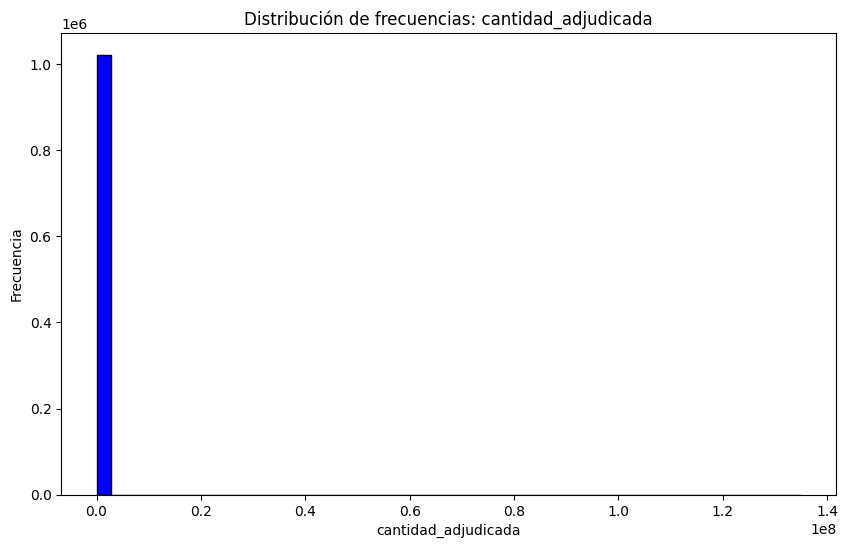


Análisis descriptivo de 'precio_unitario_adjudicado' en la tabla:
count    1.022402e+06
mean     5.368642e+07
std      4.868926e+10
min      0.000000e+00
25%      4.264000e+02
50%      4.410000e+03
75%      4.891500e+04
max      4.920780e+13
Name: precio_unitario_adjudicado, dtype: float64

Percentiles (15, 25, 50, 75, 85, 95):
0.15         95.0
0.25        426.4
0.50       4410.0
0.75      48915.0
0.85     220243.8
0.95    2376706.0
Name: precio_unitario_adjudicado, dtype: float64


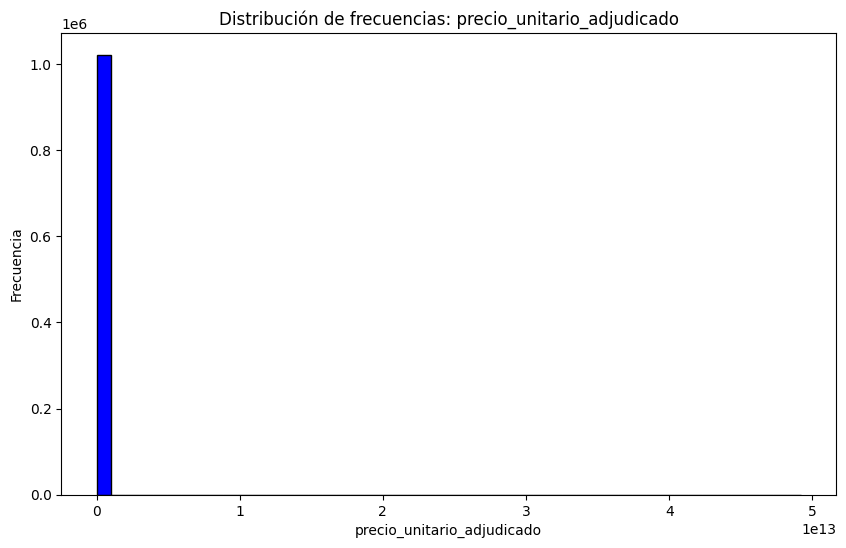


Análisis descriptivo de 'iva' en la tabla:
count    1.022398e+06
mean     6.641743e+06
std      6.329329e+09
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.258000e+02
max      6.397014e+12
Name: iva, dtype: float64

Percentiles (15, 25, 50, 75, 85, 95):
0.15        0.0
0.25        0.0
0.50        0.0
0.75      125.8
0.85     2957.5
0.95    67012.9
Name: iva, dtype: float64


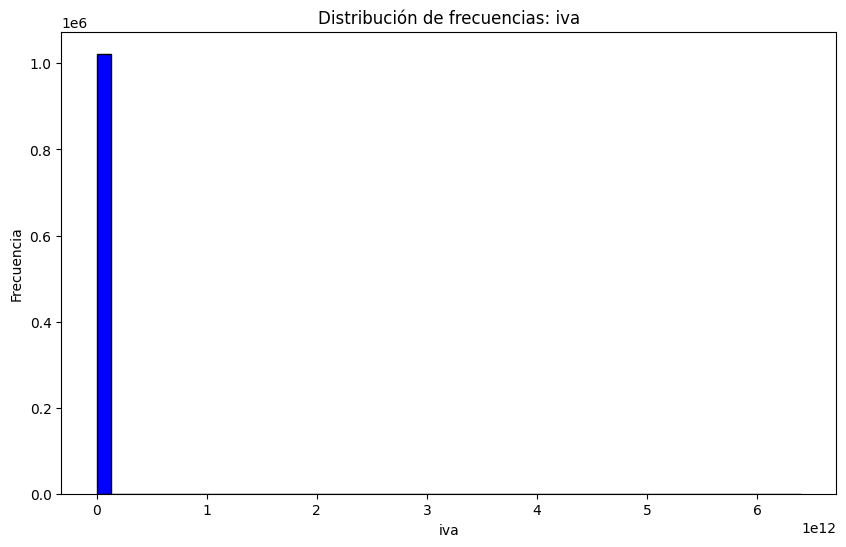


Análisis descriptivo de 'otros_impuestos' en la tabla:
count      1022402.0
mean          1548.9
std         346698.8
min              0.0
25%              0.0
50%              0.0
75%              0.0
max      226382224.6
Name: otros_impuestos, dtype: float64

Percentiles (15, 25, 50, 75, 85, 95):
0.15    0.0
0.25    0.0
0.50    0.0
0.75    0.0
0.85    0.0
0.95    0.0
Name: otros_impuestos, dtype: float64


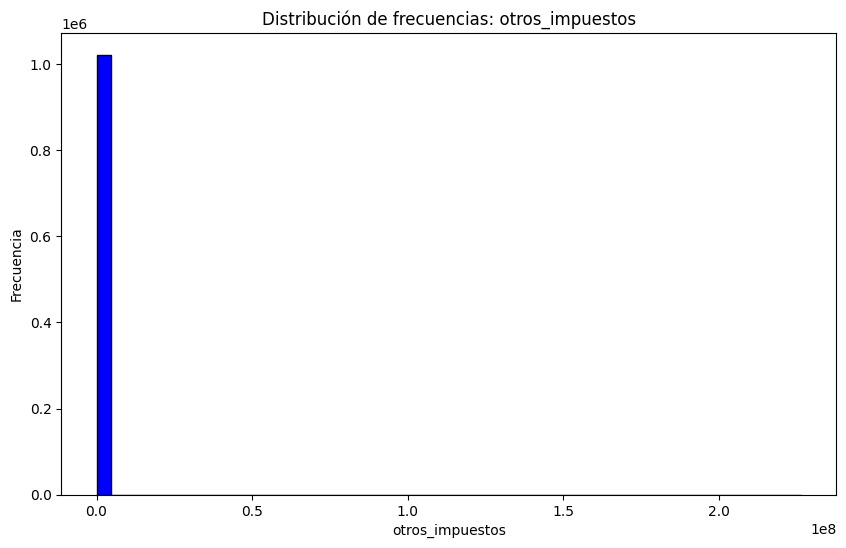

In [58]:
# Montos y var cuanti para lineasadjudicadas

analizar_columna_numerica(tablas['lineasadjudicadas'], 'cantidad_adjudicada')
analizar_columna_numerica(tablas['lineasadjudicadas'], 'precio_unitario_adjudicado')
analizar_columna_numerica(tablas['lineasadjudicadas'], 'iva')
analizar_columna_numerica(tablas['lineasadjudicadas'], 'otros_impuestos')





Análisis descriptivo de 'cantidad_ofertada' en la tabla:
count      3469327.0
mean          3393.2
std         313488.3
min              0.0
25%              1.0
50%              4.0
75%             25.0
max      135000000.0
Name: cantidad_ofertada, dtype: float64

Percentiles (15, 25, 50, 75, 85, 95):
0.15      1.0
0.25      1.0
0.50      4.0
0.75     25.0
0.85     90.0
0.95    600.0
Name: cantidad_ofertada, dtype: float64


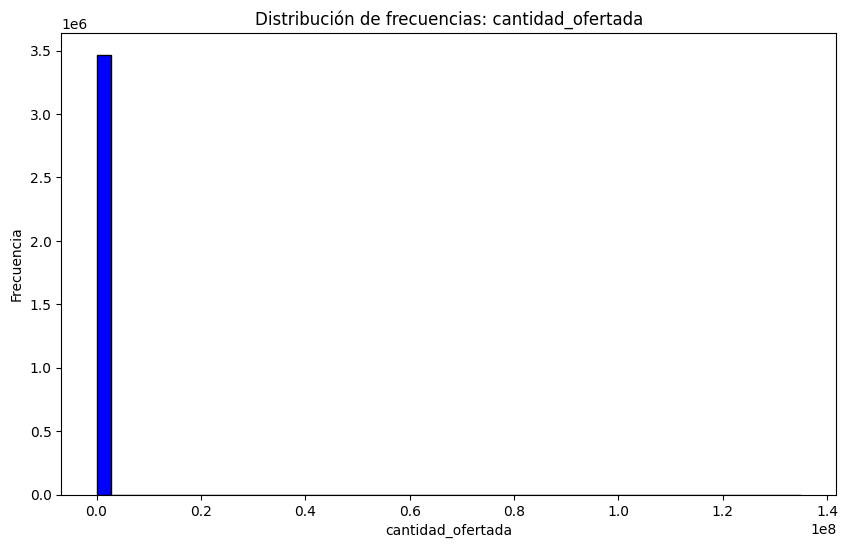


Análisis descriptivo de 'precio_unitario_ofertado' en la tabla:
count    3.468633e+06
mean     5.358513e+07
std      6.820354e+10
min      0.000000e+00
25%      5.200000e+02
50%      4.212000e+03
75%      3.905500e+04
max      1.261078e+14
Name: precio_unitario_ofertado, dtype: float64

Percentiles (15, 25, 50, 75, 85, 95):
0.15        120.0
0.25        520.0
0.50       4212.0
0.75      39055.0
0.85     177500.0
0.95    2300000.0
Name: precio_unitario_ofertado, dtype: float64


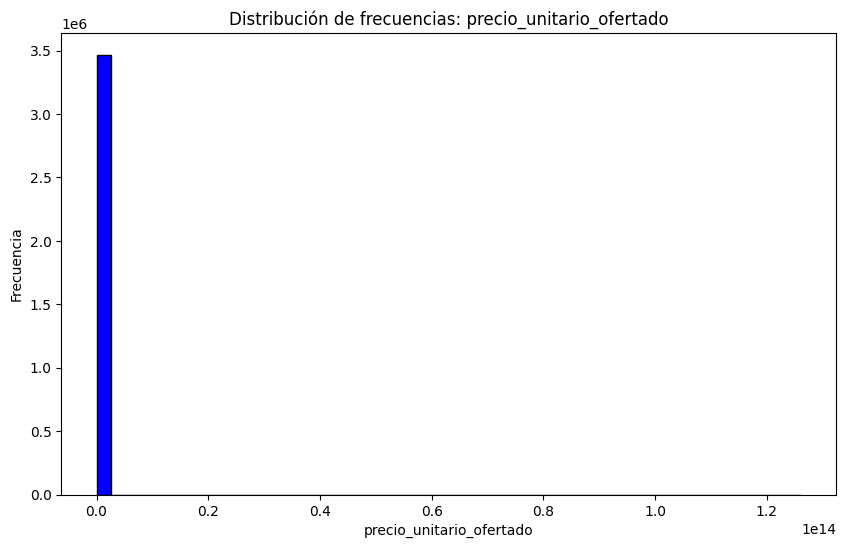


Análisis descriptivo de 'precio_unitario_ofertado' en la tabla:
count    3.468633e+06
mean     5.358513e+07
std      6.820354e+10
min      0.000000e+00
25%      5.200000e+02
50%      4.212000e+03
75%      3.905500e+04
max      1.261078e+14
Name: precio_unitario_ofertado, dtype: float64

Percentiles (15, 25, 50, 75, 85, 95):
0.15        120.0
0.25        520.0
0.50       4212.0
0.75      39055.0
0.85     177500.0
0.95    2300000.0
Name: precio_unitario_ofertado, dtype: float64


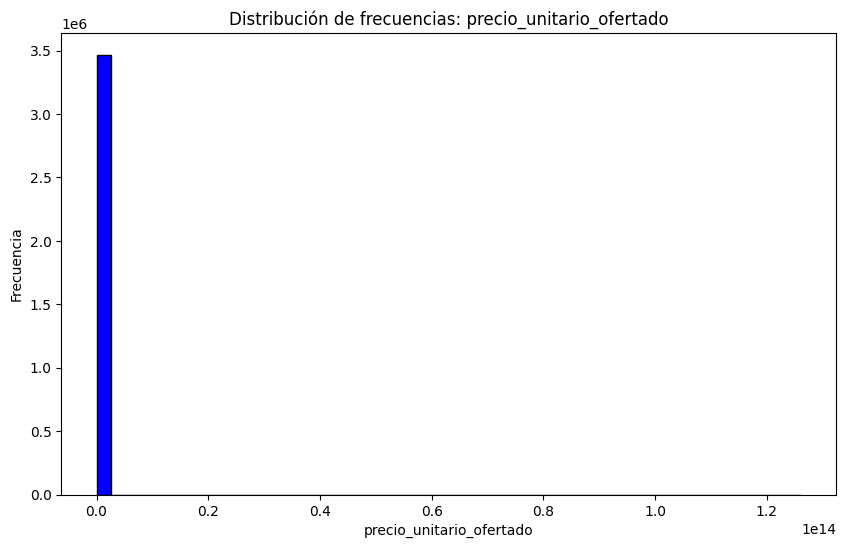


Análisis descriptivo de 'precio_unitario_ofertado' en la tabla:
count    3.468633e+06
mean     5.358513e+07
std      6.820354e+10
min      0.000000e+00
25%      5.200000e+02
50%      4.212000e+03
75%      3.905500e+04
max      1.261078e+14
Name: precio_unitario_ofertado, dtype: float64

Percentiles (15, 25, 50, 75, 85, 95):
0.15        120.0
0.25        520.0
0.50       4212.0
0.75      39055.0
0.85     177500.0
0.95    2300000.0
Name: precio_unitario_ofertado, dtype: float64


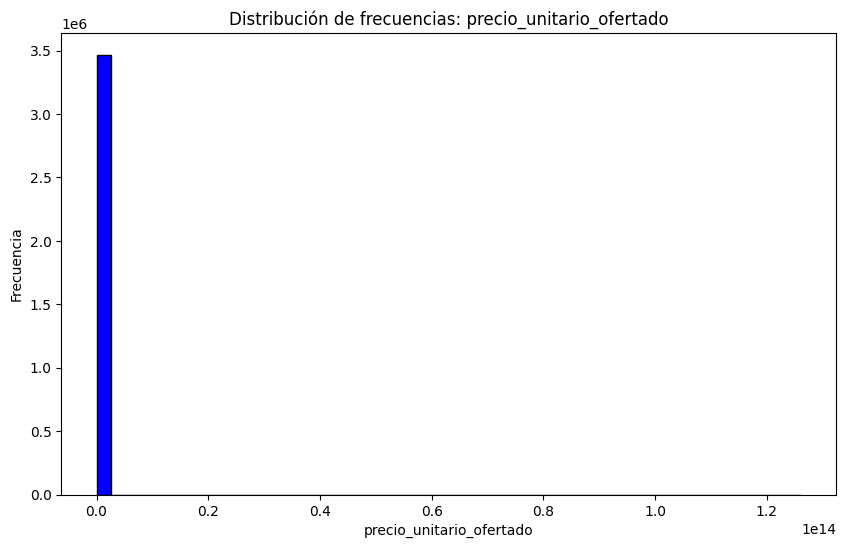


Análisis descriptivo de 'precio_unitario_ofertado' en la tabla:
count    3.468633e+06
mean     5.358513e+07
std      6.820354e+10
min      0.000000e+00
25%      5.200000e+02
50%      4.212000e+03
75%      3.905500e+04
max      1.261078e+14
Name: precio_unitario_ofertado, dtype: float64

Percentiles (15, 25, 50, 75, 85, 95):
0.15        120.0
0.25        520.0
0.50       4212.0
0.75      39055.0
0.85     177500.0
0.95    2300000.0
Name: precio_unitario_ofertado, dtype: float64


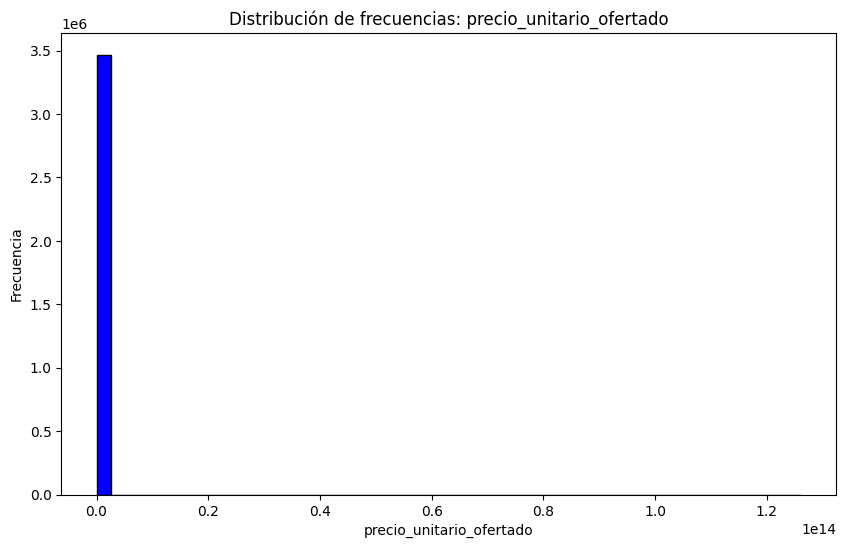

In [59]:
# Tabla lineasofertadas

analizar_columna_numerica(tablas['lineasofertadas'], 'cantidad_ofertada')
analizar_columna_numerica(tablas['lineasofertadas'], 'precio_unitario_ofertado')
analizar_columna_numerica(tablas['lineasofertadas'], 'precio_unitario_ofertado')
analizar_columna_numerica(tablas['lineasofertadas'], 'precio_unitario_ofertado')
analizar_columna_numerica(tablas['lineasofertadas'], 'precio_unitario_ofertado')

La columna 'cantidad_ofertada' no existe en la tabla.

Análisis descriptivo de 'precio_unitario_estimado' en la tabla:
count    1.300949e+06
mean     7.974695e+06
std      9.521291e+08
min      0.000000e+00
25%      2.047500e+03
50%      1.576350e+04
75%      1.650000e+05
max      5.398281e+11
Name: precio_unitario_estimado, dtype: float64

Percentiles (15, 25, 50, 75, 85, 95):
0.15        621.5
0.25       2047.5
0.50      15763.5
0.75     165000.0
0.85     608732.5
0.95    5000000.0
Name: precio_unitario_estimado, dtype: float64


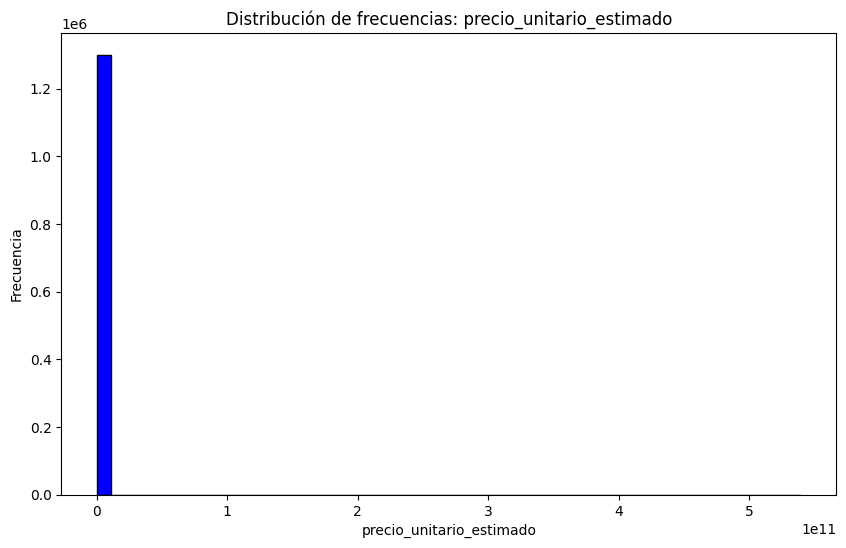

In [60]:
# Tabla lineasproc

analizar_columna_numerica(tablas['lineasproc'], 'cantidad_ofertada')
analizar_columna_numerica(tablas['lineasproc'], 'precio_unitario_estimado')


### Análisis de las categorías relevantes


Análisis de frecuencia de 'tipo_proveedor':
tipo_proveedor
Nacional Jurídico      20407
Nacional Físico        19392
Extranjero Jurídico     1001
DIMEX                    545
Extranjero Físico        139
Name: count, dtype: int64


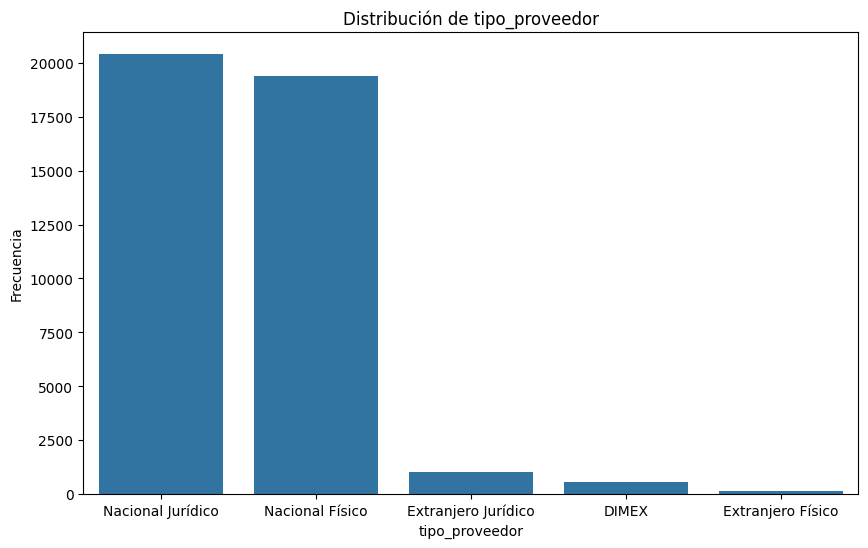


Análisis de frecuencia de 'tamano_proveedor':
tamano_proveedor
Pequeña             13709
Microemprendedor    12562
Grande               8647
Mediana              5529
No clasificado       1037
Name: count, dtype: int64


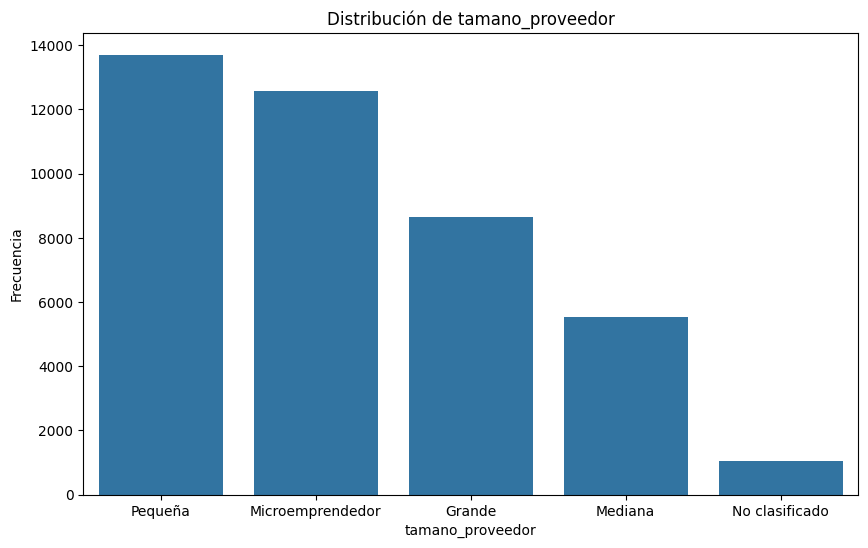

In [61]:
analizar_columnas_categoricas(tablas['proveedores'], ['tipo_proveedor', 'tamano_proveedor'])
